In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(84).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(44).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(245).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/6.jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(238).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(196).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(108).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(310).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image (5).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(186).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(29).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(140).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(224).jpg

In [2]:
import keras
#we are dealing with sequental models in deep learning.
from keras.models import Sequential
#importing convulation 2d layer for creating neural network.
#flatten layer will convert the 2d matrix to single number.
#all processing will happen in dense layer
#maxpooling layer works with conv2d,if some features are preferred over the other we have to include them
#inside the pool
#dropout feature to dropping out less important features.
from keras.layers import Conv2D,Flatten,Dense,MaxPooling2D,Dropout
#for checking accuracy of our model.
from sklearn.metrics import accuracy_score

In [3]:
import ipywidgets as widgets #for classification
import io
from PIL import Image
import tqdm
from sklearn.model_selection import train_test_split
#deal with images (inhouse python replacemnt for opencv)
import cv2
#we are dealing with image and using train_test_split so we are using shuffle 
#modlue to convert the image to train_test data
from sklearn.utils import shuffle
import tensorflow as tf

dividing our data into training and test

In [4]:
X_train=[]
Y_train=[]
image_size = 150 #scaling our image to same fixed size
#labelling the classification data that is given in the dataset.
labels =['glioma_tumor','meningioma_tumor','no_tumor','pituitary_tumor']
for i in labels:
    #os.path.join will join two paths to create a thiird path
    #training path with each tumors path.
    folderPath = os.path.join('/kaggle/input/brain-tumor-classification-mri/Training',i)
    #we need to read all the images(it lists all the files inside a folder)
    for j in os.listdir(folderPath):
        #read images
        img = cv2.imread(os.path.join(folderPath,j))
        #resize the image to the given image size.
        img = cv2.resize(img,(image_size,image_size))
        #appending the resized image to the X_train.
        X_train.append(img)
        #appending the labels to the y_train.
        Y_train.append(i)
#we will be also adding the testing data that was given to our training data.
#and we will be shuffling our final data and we will make our own training
#and testing data because user might have given us biased data.
for i in labels:
    #os.path.join will join two paths to create a thiird path
    #training path with each tumors path.
    folderPath = os.path.join('/kaggle/input/brain-tumor-classification-mri/Testing',i)
    #we need to read all the images(it lists all the files inside a folder)
    for j in os.listdir(folderPath):
        #read images
        img = cv2.imread(os.path.join(folderPath,j))
        #resize the image to the given image size.
        img = cv2.resize(img,(image_size,image_size))
        #appending the resized image to the X_train.
        X_train.append(img)
        #appending the labels to the y_train.
        Y_train.append(i)
#however this will produce X_train and Y_train of 1D array however we need them of
#numpy array
X_train = np.array(X_train)
Y_train = np.array(Y_train)

In [5]:
#shuffling both X_train and Y_train in a single statement for dividing into training
#and testing data.
X_train,Y_train = shuffle(X_train,Y_train,random_state=101)
X_train.shape

(3264, 150, 150, 3)

Train Test Split

In [6]:
#random_state will make sure that train_test_split is not biased towards one type of 
#feature
X_train,X_test,y_train,y_test = train_test_split(X_train,Y_train,test_size=0.1,random_state=101)


In [7]:
#neural network has to deal with numerical values so converting our categorical
#value to numerical value
y_train_new = []
for i in y_train:
    y_train_new.append(labels.index(i))
y_train = y_train_new
#converting the label indexes to categorical. so that our model doesnot give error.
y_train = tf.keras.utils.to_categorical(y_train)

y_test_new = []
for i in y_test:
    y_test_new.append(labels.index(i))
y_test = y_test_new
#converting the data to categorical.
y_test = tf.keras.utils.to_categorical(y_test)


Convolutional Neural Network

In [8]:
#neutral network inspired by vgg16 model where they used 16 convolution layers.
#we are creating a sequential model
model = Sequential()
#now we are creating a layer
#our first layer will be convolution 2d layer.
#inside conv2d(32parameters to train on,matrix for padding,relu for activation layer,
#input shape as we have seen before where 3 is a rgb channel.
#32 parameters means there will be 32 output units.
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(Conv2D(64,(3,3),activation='relu'))
#adding max pooling layer 2d
model.add(MaxPooling2D(2,2))
#dropping out not useful features.
model.add(Dropout(0.3))
#adding other layers for larger network
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Dropout(0.3))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(256,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))

#flattening the neural network for output array
model.add(Flatten())
#adding some dense layer for processing.
model.add(Dense(512,activation='relu'))
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.3))
#output layer(4 units because we have 4 categories)
#since we are dealing with yes/no so we are using softmax as we are using 
#probabilities otherwise we may have used sigmoid.
#each tumor image will be assigned with probabilities to each labels.
#add we will choose the one with the highest probabilites.
model.add(Dense(4,activation='softmax'))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 146, 146, 64)      18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 73, 73, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 73, 73, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 64)        36928     
                                                                 
 conv2d_3 (Conv2D)           (None, 69, 69, 64)        36928     
                                                        

In [10]:
#before training the model we need to compile the model to whole unit.
#as we have categories so we will be using categorical_crossentropy.
#if there were only two values then we could have use binary_crossentropy
#we will mostly focus on accuracy
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [11]:
#trainning the model
history = model.fit(X_train,y_train,epochs=20,validation_split=0.1)

Epoch 1/20
83/83 [==============================] - 11s 53ms/step - loss: 2.2379 - accuracy: 0.2857 - val_loss: 1.3606 - val_accuracy: 0.2925
Epoch 2/20
83/83 [==============================] - 4s 44ms/step - loss: 1.2338 - accuracy: 0.4230 - val_loss: 1.0652 - val_accuracy: 0.5952
Epoch 3/20
83/83 [==============================] - 4s 44ms/step - loss: 1.0188 - accuracy: 0.5452 - val_loss: 0.8569 - val_accuracy: 0.5544
Epoch 4/20
83/83 [==============================] - 4s 44ms/step - loss: 0.9038 - accuracy: 0.6092 - val_loss: 0.7547 - val_accuracy: 0.7279
Epoch 5/20
83/83 [==============================] - 4s 44ms/step - loss: 0.8120 - accuracy: 0.6443 - val_loss: 0.7039 - val_accuracy: 0.7007
Epoch 6/20
83/83 [==============================] - 4s 44ms/step - loss: 0.7144 - accuracy: 0.7030 - val_loss: 0.8055 - val_accuracy: 0.6293
Epoch 7/20
83/83 [==============================] - 4s 44ms/step - loss: 0.6668 - accuracy: 0.7159 - val_loss: 0.5764 - val_accuracy: 0.7653
Epoch 8/20
8

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

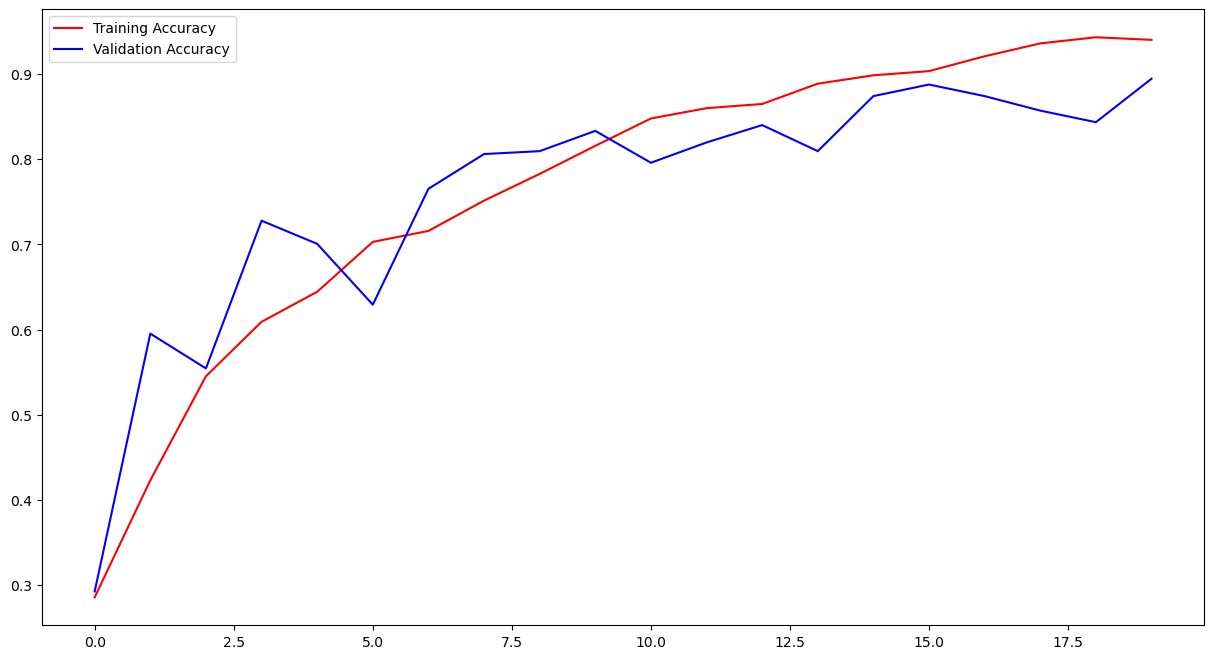

In [14]:
#saving model for future use
#model.save('braintumor.m1')
#plotting graph for accuracy
epochs = range(len(acc))
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

fig = plt.figure(figsize=(15,8))
plt.plot(epochs,acc,'r',label="Training Accuracy")
plt.plot(epochs,val_acc,'b',label="Validation Accuracy")
plt.legend(loc='upper left')
plt.show()

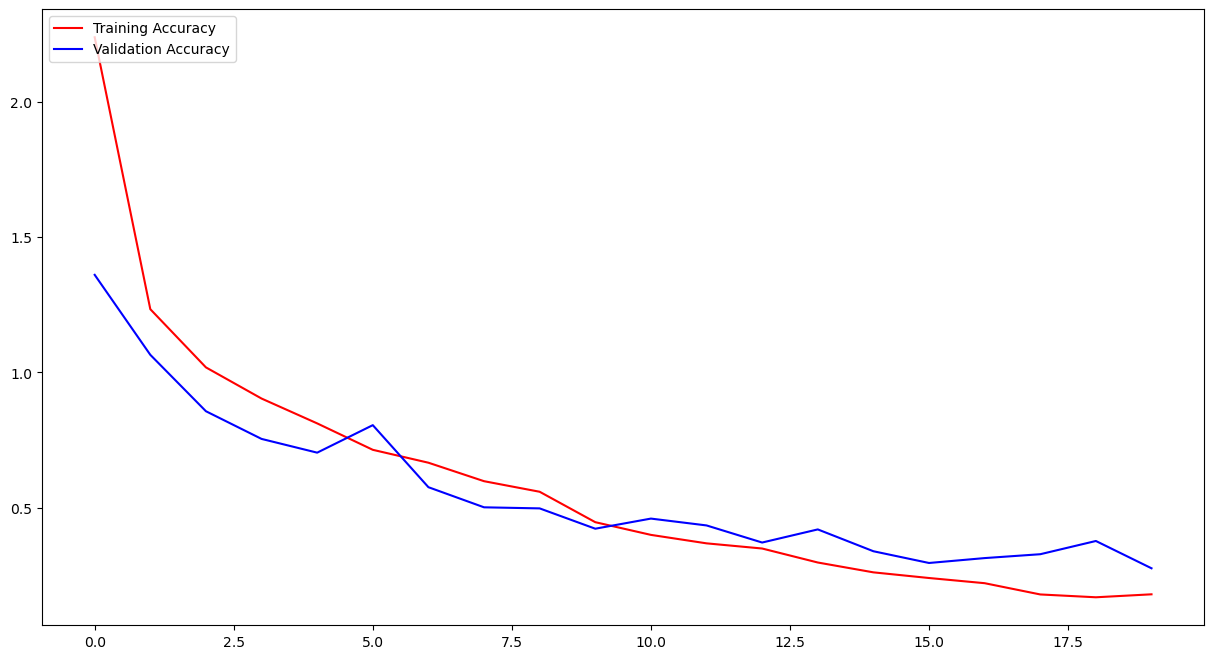

In [15]:
#graph for loss
epochs = range(len(acc))
loss = history.history['loss']
val_loss = history.history['val_loss']

fig = plt.figure(figsize=(15,8))
plt.plot(epochs,loss,'r',label="Training Accuracy")
plt.plot(epochs,val_loss,'b',label="Validation Accuracy")
plt.legend(loc='upper left')
plt.show()

# **Prediction**

In [19]:
#reading image from the data
img = cv2.imread('/kaggle/input/brain-tumor-classification-mri/Testing/pituitary_tumor/image(1).jpg')
img = cv2.resize(img,(150,150))
#converting image to array as our model requires it in array
img_array = np.array(img)
img_array.shape



(150, 150, 3)

In [20]:
#reshape the array for our model
img_array = img_array.reshape(1,150,150,3)
img_array.shape

(1, 150, 150, 3)

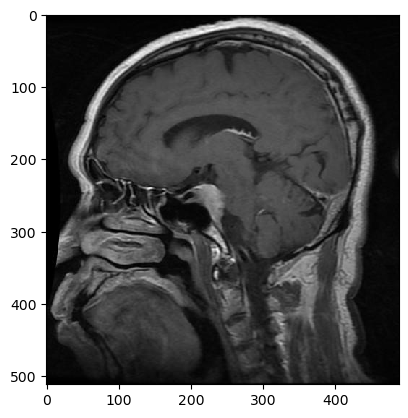

In [22]:
#predict
from tensorflow.keras.preprocessing import image
#loading image for visualization
img = image.load_img('/kaggle/input/brain-tumor-classification-mri/Testing/pituitary_tumor/image(1).jpg')
plt.imshow(img,interpolation='nearest')
plt.show()

In [23]:
a = model.predict(img_array)
#a will be a probabilitic array we have to pick the best one or max one
indices = a.argmax()
indices
#we expect 3 because 3 is pitutiary.

1/1 [==============================] - 0s 227ms/step


3